# Situacion Problema 
## Federico Garcia Gomez A01177352

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as nms
from sklearn import linear_model


# Introduccion
## Descripcion de Variables de Interes
## Mis Variables de interes son 'Gender', 'Age', 'Continent', 'Net Worth', 'Age Group', 'Rank'
* 'Gender' (Categorica) Esta variable nos interesa para dividir los supeheroes y ver si el comportamiento de su peso y altura tiene algo de relacion con el genero
* 'Age' (Numerica) Esta variable es de interes ya que describe la edad actual del billonario. 
* 'Continent' (Categorica) Esta variable es de interes ya que describe el continente en el cual nacio el billonario. 
* 'Net WoRth' (Numerica) Esta variable nos interesa gracias a que podremos observar el calor actual en activos de la persona. 
* 'Age Group' (Categorica) Esta variable no demuestra de en que grupo de edad se encuentra el billonario. 
* 'Rank' (Numerica) Esta variable nos muestra el puesto en el top 100 de la lista de billonarios del mundo.


In [2]:
df = pd.read_csv('datasets_new/Forbes Worlds Billionaires.csv')
df.head()

,Rank,Name,Age Group,Age,Source,Industry,Gender,Continent,Country,Headquarters,State,Net Worth,Title
0,1,Jeff Bezos,41-60,54.0,Amazon,Technology,Male,North America,United States,WA,Washington,112.0,"CEO and Founder, Amazon.com"
1,2,Bill Gates,61-80,62.0,Microsoft,Technology,Male,North America,United States,WA,Washington,90.0,"Cofounder, Bill & Melinda Gates Foundation"
2,3,Warren Buffett,81-100,87.0,Berkshire Hathaway,Finance and Investments,Male,North America,United States,NE,Nebraska,84.0,"CEO, Berkshire Hathaway"
3,4,Bernard Arnault,61-80,69.0,LVMH,Fashion & Retail,Male,Europe,France,NaN,NaN,72.0,"Chairman and CEO, LVMH Moet Hennessy Louis Vui..."
4,5,Mark Zuckerberg,20-40,33.0,Facebook,Technology,Male,North America,United States,CA,California,71.0,"Cofounder, Chairman and CEO, Facebook"


In [3]:
df.columns

Index(['Rank', 'Name', 'Age Group ', 'Age', 'Source', 'Industry', 'Gender',
       'Continent', 'Country', 'Headquarters', 'State', 'Net Worth', 'Title'],
      dtype='object')

## Pregunta de investigacion 1
### ¿De que continente son los billonarios con valor neto mas alto Hombres y Mujeres? dentro del top 100 billonarios del mundo?

In [4]:
my_pivot = pd.pivot_table(df,
                          index = ['Age Group ', 'Continent'],
                          values = ['Rank'],
                          #aggfunc = ['std','sum','mean','median']
                          aggfunc = ['max','mean'],
                          columns = 'Gender',
                          margins = True
                         )
my_pivot

max               mean                        
                           Rank               Rank                        
Gender                   Female   Male  All Female        Male         All
Age Group  Continent                                                      
20-40      Asia            43.0    NaN   43   43.0         NaN   43.000000
           North America    NaN   83.0   83    NaN   44.000000   44.000000
41-60      Africa           NaN  100.0  100    NaN  100.000000  100.000000
           Asia             NaN   99.0   99    NaN   60.857143   60.857143
           Europe          32.0   97.0   97   32.0   59.000000   54.500000
           North America   83.0   54.0   83   70.5   28.428571   37.777778
61-80      Asia             NaN   98.0   98    NaN   66.941176   66.941176
           Europe          86.0   91.0   91   52.0   50.875000   51.100000
           North America   34.0  100.0  100   25.0   33.266667   32.294118
           Oceania         69.0    NaN   69   69.0         NaN   69.000000
           South America   80.0   36.0   80   80.0   32.500000   48.333333
81-100     Asia             NaN   96.0   96    NaN   49.000000   49.000000
           Europe           NaN   66.0   66    NaN   39.500000   39.500000
           North America    NaN   94.0   94    NaN   44.714286   44.714286
All                        86.0  100.0  100   51.9   50.103448   50.288660

## Resultado
* #### El continente con el hombre y muejer con el valor neto mas alto es America del Norte 

## Pregunta de investigacion 2:
### ¿De que Industria son los billonarios con valor neto mas alto Hombres y Mujeres? dentro del top 100 billonarios del mundo

In [5]:
my_pivot = pd.pivot_table(df,
                          index = ['Industry'],
                          values = ['Net Worth'],
                          #aggfunc = ['std','sum','mean','median']
                          aggfunc = ['max','mean'],
                          columns = 'Gender',
                          margins = True
                         )
my_pivot

max                    mean             \
                           Net Worth               Net Worth              
Gender                        Female   Male    All    Female       Male   
Industry                                                                  
Automotive                      25.0   25.3   25.3     25.00  20.625000   
Construction & Engineering       NaN   17.8   17.8       NaN  17.800000   
Diversified                      NaN   60.0   60.0       NaN  28.550000   
Energy                           NaN   40.1   40.1       NaN  18.700000   
Fashion & Retail                46.0   72.0   72.0     44.10  33.808333   
Finance and Investments         15.9   84.0   84.0     15.90  26.900000   
Food and Beverage               23.6   27.4   27.4     19.70  21.600000   
Gambling & Casinos               NaN   38.5   38.5       NaN  29.300000   
Logistics                        NaN   15.3   15.3       NaN  15.300000   
Manufacturing                    NaN   20.1   20.1       NaN  16.960000   
Media & Entertainment            NaN   50.0   50.0       NaN  30.000000   
Metals & Mining                 17.4   19.1   19.1     16.85  17.900000   
Philanthropy/NGO                18.8    NaN   18.8     18.80        NaN   
Real Estate                     21.9   30.3   30.3     21.90  22.228571   
Service                          NaN   18.2   18.2       NaN  18.200000   
Technology                       NaN  112.0  112.0       NaN  44.086667   
Telecom                          NaN   67.1   67.1       NaN  44.900000   
All                             46.0  112.0  112.0     24.29  28.322222   

                                       
                                       
Gender                            All  
Industry                               
Automotive                  21.500000  
Construction & Engineering  17.800000  
Diversified                 28.550000  
Energy                      18.700000  
Fashion & Retail            35.278571  
Finance and Investments     25.677778  
Food and Beverage           21.125000  
Gambling & Casinos          29.300000  
Logistics                   15.300000  
Manufacturing               16.960000  
Media & Entertainment       30.000000  
Metals & Mining             17.600000  
Philanthropy/NGO            18.800000  
Real Estate                 22.187500  
Service                     18.200000  
Technology                  44.086667  
Telecom                     44.900000  
All                         27.919000

## Resultado
* #### La industria con el hombre con el valor neto mas alto es la de 'Tecnology' con 112 billones de dolares, y la industria con la mujer con el valor neto mas alto es la de 'Fashion & Retail' con 46 billones de dolares

# Pregunta de investigacion 3: 
###  ¿Cual es la tendencia en el valor neto de los top 100 billonarios del mundo?

In [6]:
import seaborn as sns

Text(0.5, 1.0, 'Histogram of Net Worth')

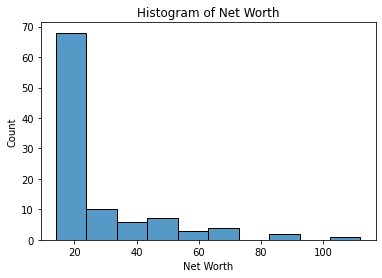

In [7]:
sns.histplot(df['Net Worth'],
             kde = False,
            bins = 10).set_title('Histogram of Net Worth')

# Resultado
* #### La mayoria de los billonarios dentro del top 100 del mundo tienen un valor neto menor a los 30 billones de dolares. 

# Pregunta de investigacion 4: 
### ¿Existe alguna correlacion entre el net worth y la edad?

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

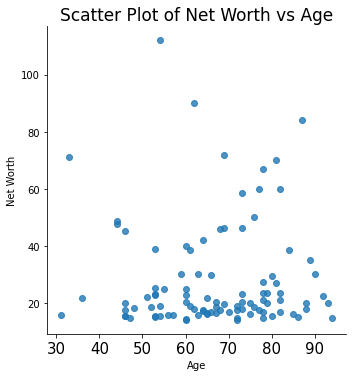

In [9]:
sns.lmplot (x = 'Age',
            y= 'Net Worth',
            data = df,
            fit_reg = False,
            
          
            
           )
plt.title('Scatter Plot of Net Worth vs Age', fontsize = 17)
plt.xticks(fontsize = 15)
plt.show()

## Resultado

* #### El net worth y la edad entre los dos generos tienen correlacion positiva solo que no muy significativa como se puede observar ya que los datos se comportan muy dispersados y no se observa una tendencia.

## Pregunta de investigacion 5: 
### ¿Se tienen valores atipicos en el valor neto o la edad de los billonarios?

Text(0.5, 1.0, 'box plot of Net Worth')

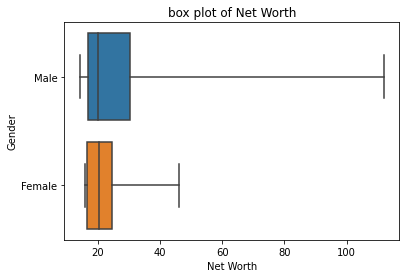

In [10]:
sns.boxplot( x =df['Net Worth'],
           whis = (0,100),
           y = df['Gender']
           ).set_title('box plot of Net Worth')

Text(0.5, 1.0, 'box plot of Weight')

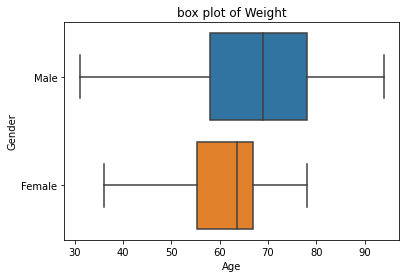

In [11]:
sns.boxplot( x =df['Age'],
           whis = (0,100),
           y = df['Gender']
           ).set_title('box plot of Weight')

## Resultados
* #### Se puede observar que no se encontraron valores atipicos ni en el valor neto asi como en la edad de los top 100 billonarios del mundo. 

## Pregunta de Investigacion 6:
#### ¿En que continente se encuentrar la mayor cantidad de billonarios?

In [12]:
counts = df['Continent'].value_counts()
counts = counts.to_frame()
counts['%'] = (counts.loc[:,'Continent']/counts.loc[:,'Continent'].sum(axis = 0))*100
counts = counts.rename({'index': 'Continent'},
                      axis = 1
                      )
counts

,Continent,%
Asia,38,37.623762
North America,35,34.653465
Europe,23,22.772277
South America,3,2.970297
Africa,1,0.990099
Oceania,1,0.990099


In [13]:
counts = counts.reset_index()
counts

,index,Continent,%
0,Asia,38,37.623762
1,North America,35,34.653465
2,Europe,23,22.772277
3,South America,3,2.970297
4,Africa,1,0.990099
5,Oceania,1,0.990099


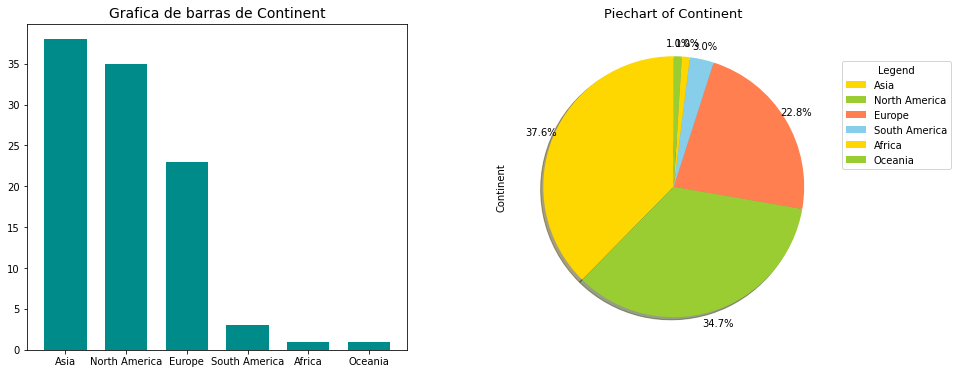

In [21]:
plt.subplot(1,2,1)
x = list(counts['Age_group'])
y = list(counts['Continent'])

plt.bar(x, y, width = 0.7, color = 'darkcyan')
plt.title('Grafica de barras de Continent', fontsize = 14)

plt.subplot(1,2,2)
color_list = ['gold', 'yellowgreen', 'coral', 'skyblue']
explode_list = [0.03, 0.04, 0.06, 0.05]

counts['Continent'].plot(kind = 'pie',
                   figsize = (15,6),
                    startangle = 90,
                    labels = None,
                    autopct = '%1.1f%%',
                    pctdistance = 1.1,
                    colors = color_list,
                    shadow = True
                  )
plt.legend(labels = counts.Age_group,
          bbox_to_anchor = (1.0, 0.9),
           title = 'Legend'
          )
plt.title('Piechart of Continent', fontsize = 13)
#plt.savefig('outputs/Age_group.png')
plt.show()

## Resultado
* #### Asia es el continente con mas porcentaje de billonarios con 37.6% seguido de America del Norte con 34.7% y Europa como tercero con 22.7% de los billonarios del top 100 del mundo.

## Pregunta de investigacion 7: 
#### ¿Cual es el impacto de Age, Gender y el continente en el Rank?

Net Worth = b0+ b1*Age

In [ ]:
df.columns

In [24]:
modelB = sm.OLS.from_formula('Rank~Age + Gender + Continent', data = df)
resultB = modelB.fit()
resultB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     2.635
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0160
Time:                        14:03:22   Log-Likelihood:                -455.66
No. Observations:                  97   AIC:                             927.3
Df Residuals:                      89   BIC:                             947.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    108.4581     31.284      3.467      0.001      46.297     170.619
Gender[T.Male]                -5.1222     10.116     -0.506      0.614     -25.223      14.978
Continent[T.Asia]            -38.2658     28.104     -1.362      0.177     -94.108      17.576
Continent[T.Europe]          -50.5097     28.497     -1.772      0.080    -107.132       6.113
Continent[T.North America]   -63.3486     28.168     -2.249      0.027    -119.317      -7.380
Continent[T.Oceania]         -35.8998     40.511     -0.886      0.378    -116.394      44.595
Continent[T.South America]   -52.4104     32.430     -1.616      0.110    -116.848      12.027
Age                           -0.0556      0.205     -0.271      0.787      -0.464       0.353
==============================================================================
Omnibus:                        6.966   Durbin-Watson:                   0.342
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                3.606
Skew:                           0.241   Prob(JB):                        0.165
Kurtosis:                       2.188   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observaciones: 
* Variable dependiente: Rank
* Variable Independiente: Age, Continent, Gender
* R-squared: 0.172; por lo tanto, este modelo no es tan efficiente. Porque explica solo 17% rank basado en age, gender, y continent.
* Df Model: 7
* La variable independiente con el valor mas significativo es el continente. 

Rank = 108.4581 -0.0556*Age -5.1222*Male -63.3486*North America

# Caso 1

In [23]:
print('Rank of a person whose age is 85, Male from North America \t', 108.4581 -(5.1222*1) -(0.0556*85) -(63.3486*1))

my_pivot = pd.pivot_table(df,
                          index = ['Age Group ', 'Continent'],
                          values = ['Rank'],
                          #aggfunc = ['std','sum','mean','median']
                          aggfunc = ['median'],
                          columns = 'Gender',
                          margins = True
                         )
my_pivot

Rank of a person whose age is 85, Male from North America 	 35.2613


median              
                           Rank              
Gender                   Female   Male    All
Age Group  Continent                         
20-40      Asia            43.0    NaN   43.0
           North America    NaN   44.0   44.0
41-60      Africa           NaN  100.0  100.0
           Asia             NaN   66.0   66.0
           Europe          32.0   42.0   39.5
           North America   70.5   32.0   39.0
61-80      Asia             NaN   65.0   65.0
           Europe          52.0   47.0   47.0
           North America   25.0   22.0   22.0
           Oceania         69.0    NaN   69.0
           South America   80.0   32.5   36.0
81-100     Asia             NaN   50.0   50.0
           Europe           NaN   43.0   43.0
           North America    NaN   34.0   34.0
All                        50.5   50.0   50.0

# Caso 2

In [25]:
print('Rank of a person whose age is 60, Male from Europe \t', 108.4581 -(5.1222*1) -(0.0556*60) -(50.5097*1)) 

myy_pivot = pd.pivot_table(df,
                          index = ['Age Group ', 'Continent'],
                          values = ['Rank'],
                          #aggfunc = ['std','sum','mean','median']
                          aggfunc = ['median'],
                          columns = 'Gender',
                          margins = True
                         )
myy_pivot

Rank of a person whose age is 60, Male from Europe 	 49.490199999999994


median              
                           Rank              
Gender                   Female   Male    All
Age Group  Continent                         
20-40      Asia            43.0    NaN   43.0
           North America    NaN   44.0   44.0
41-60      Africa           NaN  100.0  100.0
           Asia             NaN   66.0   66.0
           Europe          32.0   42.0   39.5
           North America   70.5   32.0   39.0
61-80      Asia             NaN   65.0   65.0
           Europe          52.0   47.0   47.0
           North America   25.0   22.0   22.0
           Oceania         69.0    NaN   69.0
           South America   80.0   32.5   36.0
81-100     Asia             NaN   50.0   50.0
           Europe           NaN   43.0   43.0
           North America    NaN   34.0   34.0
All                        50.5   50.0   50.0

## Conclusiones y Observaciones
* No se pudo observar correlacion entre las variables de Edad y Valor Neto
* Continente con hombre y la mujero con el valor neto mas alto es America del Norte. Mujer: 46.0 billones. Hombre: 112 billones.
* El net worth y la edad entre los dos generos tienen correlacion positiva solo que no muy significativa.
* La industria con el hombre con el valor neto mas alto es la de 'Tecnology', y la industria con la mujer con el valor neto mas alto es la de 'Fashion & Retail'
* No se tienen datos atipicos en graficas de box plot ni en edad asi como en el valor neto de ningun genero. 
* Asia es el continente con mas porcentaje de billonarios con 37.6% seguido de America del Norte con 34.7% y Europa como tercero con 22.7% de los billonarios del top 100 del mundo.¶
* Solo hay 1 persona en el top 100 que son de Oceania y America del sur y solo 3 personas de America del sur.
* La variable independiente con el valor mas significativo es el continente. 
* El modelo de prediccion no est tan confiable ya que no representa mas que el 17% de los datos.